In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
#2-multiplegradesdataset

In [3]:
df = pd.read_csv('multiplegradesdataset.csv')

In [4]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [5]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [7]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

In [8]:
df.corr(numeric_only=True)

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: >

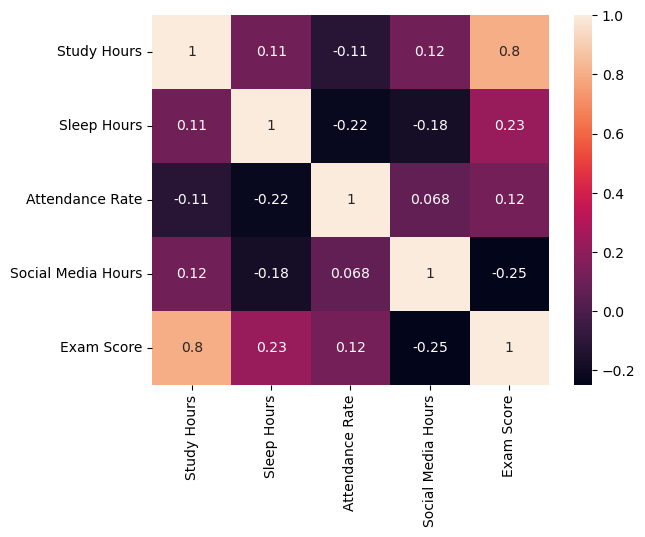

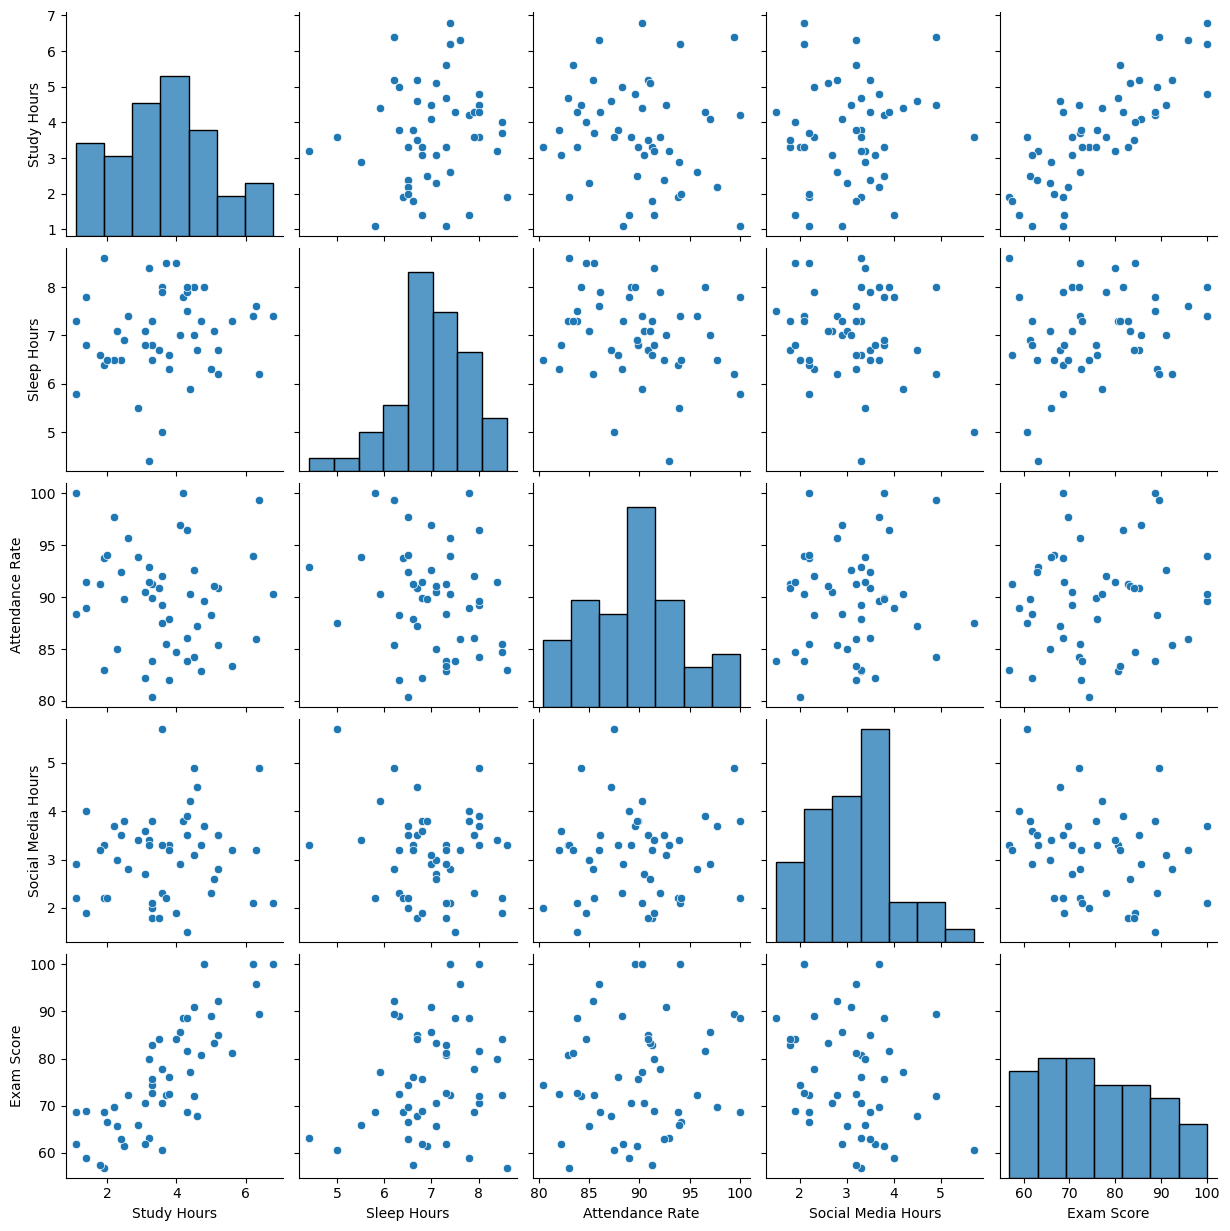

In [10]:
sns.pairplot(df)
plt.show()

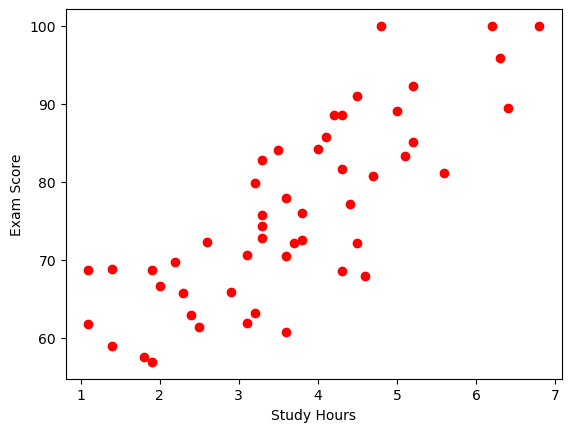

In [11]:
plt.scatter(df['Study Hours'],df['Exam Score'],color='r')
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

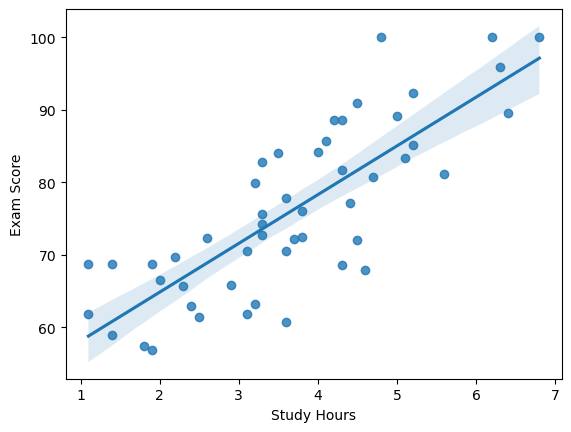

In [12]:
sns.regplot(x=df['Study Hours'],y=df['Exam Score'])
plt.show()

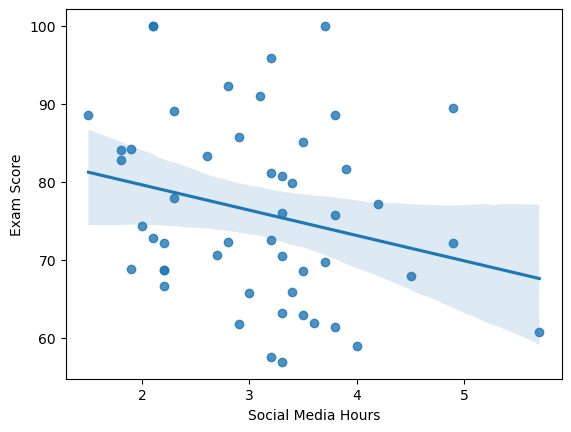

In [13]:
sns.regplot(x=df['Social Media Hours'],y=df['Exam Score'])
plt.show()

In [14]:
##independent and dependent features

In [57]:
# böyle yapabilmek için y kolonu en sonda olmalı
#X=df.iloc[:,:-1]
#y=df.iloc[:,-1]

X = df[["Study Hours", "Sleep Hours", "Attendance Rate", "Social Media Hours"]]
y = df["Exam Score"]

In [58]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [59]:
y.head()

0    80.7
1    76.0
2    89.1
3    95.9
4    70.5
Name: Exam Score, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15)

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [64]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
regression=LinearRegression()

In [67]:
regression.fit(X_train,y_train)

LinearRegression()

In [68]:
## prediction

In [69]:
y_pred = regression.predict(X_test)

In [70]:
y_pred

array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
        69.73079557,  80.76485587,  93.76445033,  65.93953528,
        64.58675718,  78.42296106,  56.67860558,  64.44046585,
       102.60438643])

In [72]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)

mse:  14.600589378986255
mae:  3.277026485962786
rmse:  3.821071757895454


In [73]:
score = r2_score(y_test, y_pred)
print('r2 score: ', score)

r2 score:  0.915670734577271


In [74]:
#adjusted R-squared
adjusted_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('adjusted r2: ', adjusted_r2)

adjusted r2:  0.8735061018659065


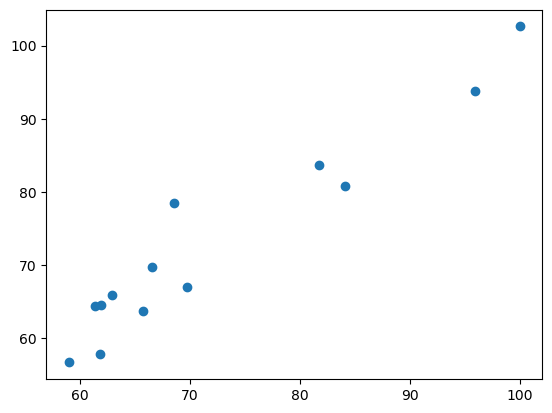

In [75]:
plt.scatter(y_test,y_pred)
plt.show()

In [76]:
y_test

35     69.7
37     61.8
41     81.7
26     65.7
38     66.6
43     84.1
3      95.9
33     62.9
30     61.9
36     68.6
14     59.0
16     61.4
20    100.0
Name: Exam Score, dtype: float64

In [77]:
y_pred

array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
        69.73079557,  80.76485587,  93.76445033,  65.93953528,
        64.58675718,  78.42296106,  56.67860558,  64.44046585,
       102.60438643])

In [78]:
fark = y_test - y_pred

In [79]:
fark

35    2.652956
37    3.894544
41   -1.930848
26    2.006006
38   -3.130796
43    3.335144
3     2.135550
33   -3.039535
30   -2.686757
36   -9.822961
14    2.321394
16   -3.040466
20   -2.604386
Name: Exam Score, dtype: float64

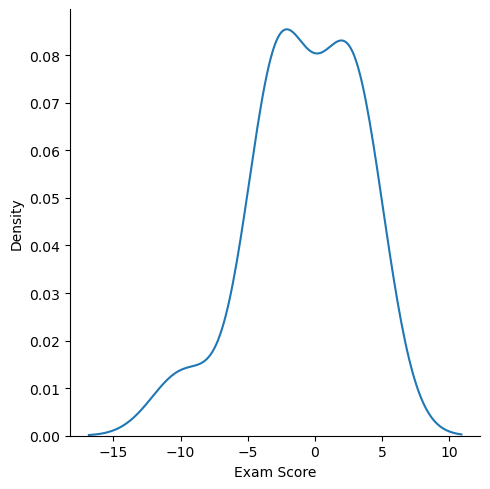

In [84]:
## if residuals are in normal distribution it seems good
sns.displot(fark,kind='kde')
plt.show()

In [86]:
print("Coefficient : ",regression.coef_)     #Katsayı
print("Intercept : ",regression.intercept_)  #Kesme noktası

Coefficient :  [ 9.28014703  1.78967062  3.24340001 -4.08127695]
Intercept :  77.41081081081082


In [87]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [88]:
students = [
    [6, 8, 95, 5],
    [3, 6, 85, 4],
    [4, 7, 80, 3]
]

In [89]:
regression.predict(scaler.transform(students))

C:\Users\sevba\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([90.37189122, 62.43586785, 72.73292556])